# LAB 6

Authors: $\lambda$ Justin Ventura [jventura3@gulls.salisbury.edu] & Blaine Mason $\lambda$

Date: Wednesday, November 18th, 2020.

## - Description -

Supervised Learning: ** k-Nearest Neighbors **

We will be using the kNN algorithm on sample tests to ensure correctness, then apply to the Iris data set (this will be simple considering we have 4 different numeric value (4D vector) and a class), and then the adult data set (this will take more work, as the qualatative data will need adjustments in order to create a numeric representation for the vector; kNN requires numeric values in order to characterize *"distance"*).

In [1]:
# Libraries:
import numpy as np                 # Ol' reliable np.
import numpy.linalg as la          # Linear Alg np.
import pandas as pd                # Dataframe handling.
import matplotlib.pyplot as plt    # Plotting
from typing import List            # For type hinting.
from scipy import stats            # Makes my life easier

# Import iris the dataset:
iris = pd.read_csv('iris.data', names=['sep_length', 'sep_width', 'pet_length', 'pet_width', 'class'])
print('iris dataset shape: ', iris.shape)

# Import the adult dataset:
adult = pd.read_csv("adult.data", header=None,
                      skipinitialspace=True, # this data has some extra whitespace
                      names=['age', 'workclass', 'fnlwgt', 'education',
                             'education-num', 'marital-status', 
                             'occupation', 'relationship', 'race',
                             'sex', 'capital_gain', 'capital_loss',
                             'hr_per_week', 'country', 'income'
                            ])
print('adult dataset shape: ', adult.shape)
print('- Justin Ventura & Blaine Mason λ')

iris dataset shape:  (150, 5)
adult dataset shape:  (32561, 15)
- Justin Ventura & Blaine Mason λ


## K-Nearest Neighbor Implementation:

I decided to make a 'knn_vector' class for the kNN_Model to simplify the operations necessary to make predictions in the model.

In [2]:
# Vector Class for the k-Nearest Neighbor Class.
class knn_vector:
    """ k-Nearest Neighbor vector class.

    This converts the format:
    List[ ( vals ... class ), ... ]

    into...
    Vector( <data>, <label> )
    """
    # Constructor of the vector class.
    def __init__(self, dim: int, vals):
        """ Initializes the vector. [Constructor]

        Args:
            dim [int]: number of quantitative elements in the list.
            vals [list]: the actual list for quantitative data + the class.
        """
        assert(dim and vals), '[init k_vect]: missing paramters!'
        assert(len(vals) - 1 == dim), '[init k_vect]: dim must equal len(values).'

        # Create the vector.
        self.dimensions = dim
        self.values = np.array(vals[0:-1])
        self.label = vals[-1]


    # Getter function for the values.
    def get_values(self):
        """ Return the values of the vector (no label).

        Args:
            None.  Just a simple getter.

        Returns:
            self.values [np.array(float/int)]: simple getter.
        """
        return self.values


    # Getter function for the label.
    def get_label(self):
        """ Return the label of the vector.

        Args:
            None.  Just a simple getter.

        Returns:
            self.label [any, typically int]: simple getter.
        """
        return self.label


    # Dunder for length:
    def __len__(self) -> int:
        """ Dunder for length. 
        
        Returns self.dimensions as len(<knn_vector>).
        """
        return self.dimensions


    # Dunder for printing:
    def __str__(self):
        """ Dunder for printing.

        Returns formatted string -> Vect: <vector>, Label: <label>.
        """
        return f'Vect: {self.values}, Label: {self.label}'


# K-Nearest Neighbor Class.
class kNN_Model:
    """ k-Nearest Neighbors Model Class.
    
    Uses training data in order to predict future values
    of new query points.
    """
    # kNN Model Constructor.
    def __init__(self, train_vect: List[knn_vector], k: int=3) -> None:
        """ Initializes the training_data. [Constructor] 
        
        Args:
            k [int]: the number of neighbors the model should
                     use in the 'voting' system. 3 by default.

            train_x [list]: pre-labeled (class) training data.
            
            -> train_x format: list[list[tuple(<numeric-data>), class]]
        """
        self.k = k
        self.training_vect = train_vect


    # Calculate the distances of each train vector from the test vector.
    def distances(self, test_v=None) -> list:
        """ Calculates the distance between the training data & test point. 
        NOTE: done in linear O(n) time.

        Args:
            test_v [tuple]: a specific value to be tested against the training
            data.
        """
        return [la.norm(t.get_values() - test_v, axis=0) for t in self.training_vect]


    # Give the model training data.
    def train(self, train_v: List[knn_vector]=None) -> None:
        """ Trains the model with pre-labelled data.
        
        Args:
            train_x [ List[knn_vector] ]: the training data used to train model.
            * NOTE: if train_v is None, function immediately returns. *
            
            -> train_x format: list[list[tuple(<numeric-data>), class]]

        Returns:
            None.
        """
        if not self.training_vect:
            self.training_vect = train_v


    # Predict the value of a given query point; returns label.
    def predict(self, query_point=None):
        """ Uses the model in order to predict what to label the query point.
        
        Args:
            query_point [tuple(<numeric_data>)]: the point in which a class will
            be predicted for.
            
        Returns:
            'Class' [int]: The 'Class' will be the numeric class that this algorithm
                           deems closest to the possible classes it has been trained
                           to identify.
        """
        # TODO: use a k-d tree for O(logn) searches.  For now we can use the
        # naive O(n) "brute force" approach.
        assert(query_point is not None), '[kNN_Model.predict()]: query point undefined.'

        # Get the top k vectors with lowest distances:
        labels = [v.get_label() for v in self.training_vect]
        dist = zip(self.distances(query_point), labels)
        dist = sorted(dist)

        # Get the 'votes' from the candidates and return the 'winner.'
        candidates = [d[1] for d in dist[:self.k]]
        return stats.mode(candidates)[0]

## Testing kNN model with k = 5.

In this cell, I came up with semi-random* points to mark 'territories' for each class.  Then for points $(x, y)$ sampled uniformly random $\in [-4, 4]$, were used to test against the model.  I am aware that the training data is usually supposed to be greater than the testing data, but I found it interesting to see the cool clusters that form from 100-1000 samples from just knowing 5 points in each class (15 training points in total).

*semi-random with bias for my own 'clusters.'

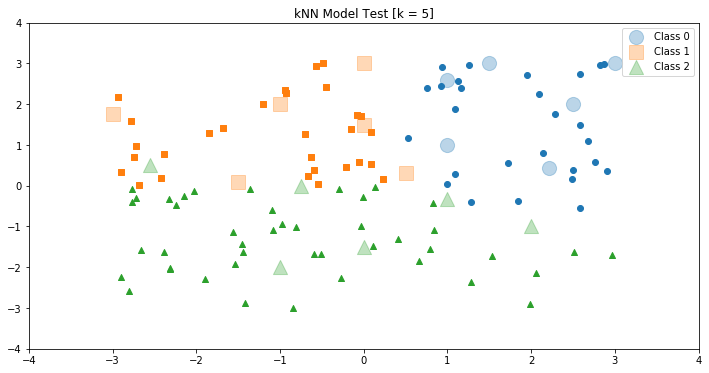

Class 0 has 0.27% of the 'territory.'
Class 1 has 0.29% of the 'territory.'
Class 2 has 0.44% of the 'territory.'


In [3]:
"""
K-NEAREST NEIGHBORS MODEL TESTING CELL:

Justin's IQ peaked while making this. (approximately 56 IQ points, new record!)
"""
# Set up the training data.
train_points0 = [(2.5, 2, 0), (1.5, 3, 0), (1, 2.6, 0), (1, 1, 0), (3, 3, 0), (2.21, 0.44, 0)]
train_points1 = [(-1, 2, 1), (.5, 0.3, 1), (0, 3, 1), (0, 1.5, 1), (-3, 1.75, 1), (-1.5, 0.10, 1)]
train_points2 = [(-1, -2, 2), (-.75, 0, 2), (2, -1, 2), (0, -1.5, 2), (-2.55, 0.5, 2), (1, -0.33, 2)]
train_data = train_points0 + train_points1 + train_points2
train_data = [knn_vector(2, v) for v in train_data]
Lambda = kNN_Model(train_data, 5)

# Take random samples for now.
NUM_SAMPLES = 100
plt.rcParams['figure.figsize'] = [12, 6]
sample_data = {'Class 0': 0, 'Class 1': 0, 'Class 2': 0}
for i in range(NUM_SAMPLES):
    query = np.random.uniform(-3, 3), np.random.uniform(-3, 3)
    result = Lambda.predict(query)
    if result == 0:
        sample_data['Class 0'] += 1
        plt.scatter(query[0], query[1], c='tab:blue', marker='o')
    elif result == 1:
        sample_data['Class 1'] += 1
        plt.scatter(query[0], query[1], c='tab:orange', marker='s')
    elif result == 2:
        sample_data['Class 2'] += 1
        plt.scatter(query[0], query[1], c='tab:green', marker='^')

# Now plot it all, gamers RISE!
X0 = [x for x, _, _ in train_points0]
Y0 = [y for _, y, _ in train_points0]
X1 = [x for x, _, _ in train_points1]
Y1 = [y for _, y, _ in train_points1]
X2 = [x for x, _, _ in train_points2]
Y2 = [y for _, y, _ in train_points2]
plt.title('kNN Model Test [k = 5]')
plt.scatter(X0, Y0, c="tab:blue", label='Class 0', s=200, alpha=0.3, marker='o')    # training group 0
plt.scatter(X1, Y1, c="tab:orange", label='Class 1', s=200, alpha=0.3, marker='s')  # training group 1
plt.scatter(X2, Y2, c="tab:green", label='Class 2', s=200, alpha=0.3, marker='^')   # training group 2
plt.legend()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()
for c, count in sample_data.items():
    print(f"{c} has {count/NUM_SAMPLES}% of the 'territory.'")
pass

## Supervised Test against specific points.

Now we will pick points and give them labels, then compare them to the predictions.  Note that class0 has 1 incorrect prediction, class1 has no incorrect predictions, and class2 has 3 incorrect predictions.  See the included .pdf for the confusion matrix I drew.

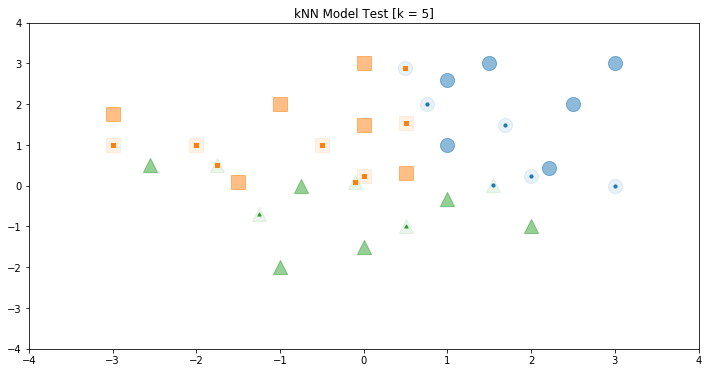

Large/Transparent=ACTUAL, Thick/Small=PREDICTED


In [4]:
# These are pre-labelled points in order to come up with a confusion matrix.
test_points0 = [(2, 0.25), (0.75, 2), (0.49, 2.89), (1.69, 1.5), (3, 0)]
test_points1 = [(0.51, 1.55), (0, 0.24), (-0.5, 1), (-2, 1), (-3, 1)]
test_points2 = [(-1.75, 0.5), (-0.1, 0.1), (1.55, 0.02), (0.5, -1), (-1.25, -0.70)]


# This function scatters the resulting points.
def scatter_test(test, result):
    """ Function to scatter results to the plot.

    Args:
        test [ tuple(float) ]: the query point to test on the model.

        result [ any<label> ]: the actual query point label.

    Returns:
        None.  Just plots.
    """
    if test in test_points0:
        plt.scatter(test[0], test[1], c='tab:blue', s=200, marker='o', alpha=0.1)
    elif test in test_points1:
        plt.scatter(test[0], test[1], c='tab:orange', s=200, marker='s', alpha=0.1)
    elif test in test_points2:
        plt.scatter(test[0], test[1], c='tab:green', s=200, marker='^', alpha=0.1)

    if result == 0:
        plt.scatter(test[0], test[1], c='tab:blue', s=10, marker='o')
    elif result == 1:
        plt.scatter(test[0], test[1], c='tab:orange', s=10, marker='s')
    elif result == 2:
        plt.scatter(test[0], test[1], c='tab:green', s=10, marker='^')


# Run up the tests!
plt.rcParams['figure.figsize'] = [12, 6]
for t in test_points0:
    r = Lambda.predict(t)
    scatter_test(t, r)

for t in test_points1:
    r = Lambda.predict(t)
    scatter_test(t, r)

for t in test_points2:
    r = Lambda.predict(t)
    scatter_test(t, r)

# Plot the given points again.
plt.title('kNN Model Test [k = 5]')
plt.scatter(X0, Y0, c="tab:blue", s=200, alpha=0.5, marker='o')    # training group 0
plt.scatter(X1, Y1, c="tab:orange", s=200, alpha=0.5, marker='s')  # training group 1
plt.scatter(X2, Y2, c="tab:green", s=200, alpha=0.5, marker='^')   # training group 2
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()
print('Large/Transparent=ACTUAL, Thick/Small=PREDICTED')
del Lambda
pass

## Write a python routines to split a given data set (randomly) into testing and training subsets. It’s a good idea to parameterize this process with a percentage p so the data is split into sets of size np and n(1 − p); then you can “tune” p later for your specific training/testing procedure.

In [5]:
# Data splitting function.
def partition(n: int, p: float, vectors: List[knn_vector]):
    """ Partition the given knn_vectors into training/testing groups.
        NOTE: this is done at random.
    Args:
        n [int]: number of knn_vectors.
        
        p [float]: percentage for the training/testing split.

        vectors [ List[knn_vector] ]: a list of all the vectors which will
                   be partitioned into two groups.

    Returns:
        test, train [ tuple( List[knn_vectors] ) ]: the partitioned data
                   in two groups with lengths np & n(1-p) respectively.
    """
    # Assertions:
    assert(vectors is not None), '[partition]: no vectors given!'
    assert(n == len(vectors)), '[partition] n is not equal to # vectors.'
    assert(0.1 <= p < 1), '[partition]: groups must be validly partitioned!'
    
    # Perform the partioning:
    train_size = int(n*p)
    group = np.random.shuffle(vectors)
    train, test = vectors[:train_size], vectors[train_size:]
    
    # Return the training and testing:
    return train, test

##  Using the iris dataset, test your kNN algorithm to predict which class a given iris belongs to.

**(a) Show some confusion matrices for different size testing versus training datasets.**

See pdf included in directory.

**(b) How does the accuracy change for different size training sets? Show how the accuracy changes within the training set and testing set separately.**

*These results were found with k = 5 in the model.*  Based on some testing, the predictions get better on average as the training set gets larger.  This is most likely due to the fact that with more training data, the 'clusters' for each type of flower are less subtle and more defining.  However, even with a with a 90/10 split, it is never a guarantee that the model will correctly predict every possible flower.

**(c) What if you repeat this process, keeping the training fraction p the same? Does the accuracy change drastically based on the “quality” of the testing set? How might you quantify this behavior?**

This is hard question to answer, but it seems that the more even the distribution of each flower type (equal number across each flower-type count in the training set) yields better results.  This is probably due to the fact that even distribution results in a model with less bias, since it is more likely that the model can distinguish two flowers.  This is not always true since, for example, not all Iris-setosa are the same; therefore, some bias still exists.

In [39]:
# Convert iris data to vectors.
def iris_to_vectors(iris_data):
    """ Converts a DF to a list of kNN_vectors.

    Args:
        iris_data [pd.df]: df to be converted.

    Return:
        result [List[knn_vectors]]: formatted vectors for the kNN model.
    """
    rows = list(iris_data[0:-1].to_records(index=False))
    results = []
    for r in rows:
        results.append(knn_vector(4, list(r)))
    return results


# Testing samples:
def iris_predictions(model: kNN_Model, test_data: List[knn_vector]):
    """ Tests the kNN_Model with Iris data.

    Args:
        model [kNN_Model]: the pre-trained model to do predictions.

        test_data [ List[knn_vector] ]: the data to predict.

    Returns:
        None.  Just prints.
    """
    # Initialize counts for confusion matrix.
    setosa_totals = 0
    setosa_correct = 0
    versi_totals = 0
    versi_correct = 0
    virgin_totals = 0
    virgin_correct = 0

    # Run the tests:
    for elem in test_data:

        # Predict the flower type.
        result = model.predict(elem.get_values())

        # Accumulate flowers:
        if elem.get_label() == 'Iris-setosa':
            setosa_totals += 1
            if elem.get_label() == result:
                setosa_correct += 1

        elif elem.get_label() == 'Iris-versicolor':
            versi_totals += 1
            if elem.get_label() == result:
                versi_correct += 1

        elif elem.get_label() == 'Iris-virginica':
            virgin_totals += 1
            if elem.get_label() == result:
                virgin_correct += 1

    # Calculate overall results:
    totals = setosa_totals + versi_totals + virgin_totals
    correct = setosa_correct + versi_correct + virgin_correct
    
    # Display the results:
    print('-'*50)
    print('Iris-setosa results:')
    print(f'Actual: {setosa_totals}, predicted: {setosa_correct}.')
    print(f'Precision: {setosa_correct/setosa_totals * 100}%')
    print('-'*50)
    print('Iris-versicolor results:')
    print(f'Actual: {versi_totals}, predicted: {versi_correct}.')
    print(f'Precision: {versi_correct/versi_totals * 100}%')
    print('-'*50)
    print('Iris-viginica results:')
    print(f'Actual: {virgin_totals}, predicted: {virgin_correct}.')
    print(f'Precision: {virgin_correct/virgin_totals * 100}%')
    print('-'*50)
    print(f'Overall model results:')
    print(f'Total: {totals}, correctly predicted: {correct}.')
    print(f'Precision: {correct/totals * 100}%')

# Run some tests, get some data:
p = 0.9
data = iris_to_vectors(iris)
training, testing = partition(len(data), p, vectors=data)

# Give the model training data, then predict with testing data.
Lambda = kNN_Model(training, k=5)
iris_predictions(Lambda, testing)

--------------------------------------------------
Iris-setosa results:
Actual: 6, predicted: 6.
Precision: 100.0%
--------------------------------------------------
Iris-versicolor results:
Actual: 7, predicted: 7.
Precision: 100.0%
--------------------------------------------------
Iris-viginica results:
Actual: 2, predicted: 1.
Precision: 50.0%
--------------------------------------------------
Overall model results:
Total: 15, correctly predicted: 14.
Precision: 93.33333333333333%


## Try using the adult dataset to also do some prediction of income level (more or less than $50k).

**(a) How can you try to quantify the “distance” between two adults? Write some small python functions to try and transform this data into something that can be used by the kNN classifier. Try a couple different approaches, report their different behaviors and illustrate using learning curves, confusion matrices, and possibly some statistical measurements.**



**(b) Are there other “labels” within the dataset that can be effectively learned by the kNN classifier?**

TODO.

In [92]:
# TODO: convert a row of adult data to a knn_vector.

def adult_to_vector(adult_data, dim):
    rows = list(adult_data.to_records(index=False))
    results = []
    for r in rows:
        results.append(knn_vector(dim, list(r)))
    return results
def adult_perdictions(model: kNN_Model, test_data: List[knn_vector]):
    """ Tests the kNN_Model with Adult data.

    Args:
        model [kNN_Model]: the pre-trained model to do predictions.

        test_data [ List[knn_vector] ]: the data to predict.

    Returns:
        None.  Just prints.
    """
    # Initialize counts for confusion matrix.
    less_than = 0
    less_than_correct = 0
    greater_than = 0
    greater_than_correct = 0

    # Run the tests:
    for elem in test_data:
        result = model.predict(elem.get_values())

        if elem.get_label() == '<=50K':
            less_than += 1
            if elem.get_label() == result:
                less_than_correct += 1

        elif elem.get_label() == '>50K':
            greater_than += 1
            if elem.get_label() == result:
                greater_than_correct += 1

    # Calculate overall results:
    totals = less_than + greater_than
    correct = less_than_correct + greater_than_correct 
    
    # Display the results:
    print('-'*50)
    print('<=50k results:')
    print(f'Actual: {less_than}, predicted: {less_than_correct}.')
    print(f'Precision: {less_than_correct/less_than * 100}%')
    print('-'*50)
    print('>50k results:')
    print(f'Actual: {greater_than}, predicted: {greater_than_correct}.')
    print(f'Precision: {greater_than_correct/greater_than * 100}%')
    print('-'*50)
    
    
temp_data = adult[["education-num", "hr_per_week", "age", "income"]]
temp_data2 = adult[["education-num", "hr_per_week", "age", "sex", "income"]].replace({"Female": 0, "Male": 1})
temp_data3 = adult[["education-num", "hr_per_week", "age", "sex", "occupation", "income"]]
temp_data2 = temp_data2.replace({"Female": 0, "Male": 1})
temp_data3 = temp_data3.replace({"Female": 0, "Male": 1})
temp_data3 = temp_data3.replace({'Adm-clerical': 0, 'Exec-managerial': 1, 'Handlers-cleaners': 2,
       'Prof-specialty': 3, 'Other-service': 4, 'Sales': 5, 'Craft-repair': 6,
       'Transport-moving': 7, 'Farming-fishing': 8, 'Machine-op-inspct': 9,
       'Tech-support': 10, '?': 11, 'Protective-serv': 12, 'Armed-Forces': 13,
       'Priv-house-serv': 14})
n = 3000
data = adult_to_vector(temp_data[0:n], 3)
print("With education-num, hr_per_week, and age")
print(f'K: {3}')
p = .8
training, testing = partition(len(data), p, vectors=data)
Lambda = kNN_Model(training, k=3)
adult_perdictions(Lambda, testing)

data = adult_to_vector(temp_data2[0:n], 4)
print("")
print("With education-num, hr_per_week, age, and sex")
print(f'K: {4}')
p = .8
training, testing = partition(len(data), p, vectors=data)
Lambda = kNN_Model(training, k=4)
adult_perdictions(Lambda, testing)

data = adult_to_vector(temp_data3[0:n], 5)
print("")
print("With education-num, hr_per_week, age, sex, and occupation")
print(f'K: {10}')
p = .8
training, testing = partition(len(data), p, vectors=data)
Lambda = kNN_Model(training, k=10)
adult_perdictions(Lambda, testing)

With education-num, hr_per_week, and age
K: 3
--------------------------------------------------
<=50k results:
Actual: 435, predicted: 397.
Precision: 91.26436781609195%
--------------------------------------------------
>50k results:
Actual: 165, predicted: 45.
Precision: 27.27272727272727%
--------------------------------------------------

With education-num, hr_per_week, age, and sex
K: 4
--------------------------------------------------
<=50k results:
Actual: 463, predicted: 428.
Precision: 92.44060475161987%
--------------------------------------------------
>50k results:
Actual: 137, predicted: 23.
Precision: 16.78832116788321%
--------------------------------------------------

With education-num, hr_per_week, age, sex, and occupation
K: 10
--------------------------------------------------
<=50k results:
Actual: 445, predicted: 425.
Precision: 95.50561797752809%
--------------------------------------------------
>50k results:
Actual: 155, predicted: 37.
Precision: 23.8709677

In [73]:
adult['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)